# HW2 Multinomial Bayes Classfier

#### Name: Haochen (Harry) Wang

In [1]:
from run import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harrywanghc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
tp, tn, fp, fn = naive_bayes(0.2,0.2,0.2,0.2,laplacesmooth=True,logbool=True)

Loading Data, at time 0.00 sec
Learning Training Data, at time  4.82 sec
Testing Positive, at time  7.05 sec
Testing Negative, at time  7.49 sec
Total Time Cost is  7.91 sec
Accuarcy  is:  0.816996
Precision is:  0.865072
Recall    is:  0.753538
F-Score   is:  0.805462


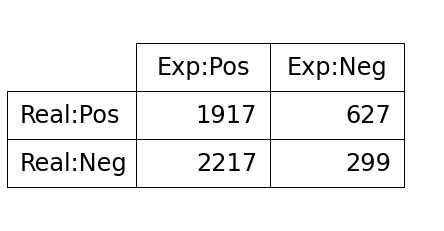

In [6]:
confusionmatrix(tp,tn,fp,fn)

### Q.1 (18 Points) 

##### You will first run an experiment to evaluate how the performance of the Naive Bayes algorithm is affected depending on whether (i) you classify instances by computing the pos- terior probability, Pr(yi | Doc), according to the standard equation (Eq. (1)); or (ii) you classify instances by performing the log-transformation trick discussed in class and compare log-probabilities, log(Pr(yi | Doc)), instead of probabilities. Recall, in particular, that estimating the posterior probability using Eq. (1) might cause numerical issues/instability since it requires computing the product of (possibly) hundreds of small terms—which makes this probability estimate rapidly approach zero. To tackle this problem, we often compare not Pr(y1 | Doc) and Pr(y2 | Doc), but the corresponding log-probabilities: log(Pr(y1 | Doc)) and log(Pr(y2 | Doc)). Taking the logarithm of such probabilities transforms the product of hundreds of terms into the sum of hundreds of terms—which avoids numerical issues. Importantly, it does not change which class is more likely according to the trained model. When classifying a new instance, the log-probabilities that should be compared, for each class yi, are as follows:
$$ log(Pr(y_i|doc)) = log\left( Pr(y_i) \prod_{k=1}^{len(Doc)} Pr(w_k|y_i)\right) $$
$$ log(Pr(y_i|doc)) = log\left( Pr(y_i) +  \sum_{k=1}^{len(Doc)} Pr(w_k|y_i)\right) $$
##### In this experiment, you should use 20% of the training set and 20% of the test set; i.e., call the dataset-loading functions by passing 0.2 as their parameters. First, perform the classification of the instances in the test set by comparing posterior probabilities, Pr(yi | Doc), according to Eq. (1), for both classes. Then, report (i) the accuracy of your model; (ii) its precision; (iii) its recall; and (iv) the confusion matrix resulting from this experiment. Now repeat the same experiment above but classify the instances in the test set by comparing log-probabilities, log(Pr(yi | Doc)), according to Eq. (5), for both classes. Report the same quantities as before. Discuss whether classifying instances by computing log-probabilities, instead of probabilities, affects the model’s performance. Assuming that this transformation does have an impact on performance, does it affect more strongly the model’s accuracy, precision, or recall? Why do you think that is the case?

#### Q1 Answer:

In [ ]:
tp, tn, fp, fn = naive_bayes(0.2,0.2,0.2,0.2,laplacesmooth=False,logbool=False)

### Q.2 (18 Points) 
##### An issue with the original Naive Bayes formulation is that if a test instance contains a word that is not present in the vocabulary identified during training, then Pr(word|label) = 0. To mitigate this issue, one solution is to employ Laplace Smoothing. To do so, as discussed in class, we replace the standard way of estimating the probability of a word wk, given a class yi, with the following equation:
$$ Pr(w_k|y_i) = \frac{n(w_k,y_i)+1}{\sum_{s=1}^{|V|} n(w_s,y_i)+|V|} $$
##### More generally, Laplace Smoothing can be performed according to a parametric equation, where instead of adding 1 to the numerator, we adjust the probability of a word belong to a class by adding a user-defined parameter α to the numerator, as follows:
$$ Pr(w_k|y_i) = \frac{n(w_k,y_i)+\alpha}{\sum_{s=1}^{|V|} n(w_s,y_i)+\alpha|V|} $$
##### Intuitively, setting α = 0 results in the standard formulation of Naive Bayes—which does not tackle the problem of words that do not appear in the training set. Suppose, alternatively, that we set α = 4. This is equivalent to adding 4 “fake” occurrences of that word to the training set, in order to avoid the zero-frequency problem. Using α = 1000, on the other hand, is equivalent to pretending we have seen that word 1000 times in the training set—even though we may have seen it, say, only 8 times. Although this solves the problem of zero-frequency words, it also strongly biases the model to “believe” that that word appears much more frequently than it actually does; and this could make the predictions made by the system less accurate. For these reasons, although it is important/necessary to perform Laplace Smoothing, we have to carefully pick the value of α that works best for our dataset. Using α = 1 is common, but other values might result in better performance, depending on the dataset being analyzed.
##### In this experiment, you should use 20% of the training set and 20% of the test set; i.e., call the dataset-loading functions by passing 0.2 as their parameters. You should first report the confusion matrix, precision, recall, and accuracy of your classifier (when evaluated on the test set) when using α = 1. Now, vary the value of α from 0.0001 to 1000, by multiplying α with 10 each time. That is, try values of α equal to 0.0001, 0.001, 0.01, 0.1, 1.0, 100, and 1000. For each value, record the accuracy of the resulting model when evaluated on the test set. Then, create a plot of the model’s accuracy on the test set (shown on the y-axis) as a function of the value of α (shown on the x-axis). The x-axis should represent α values and use a log scale. Analyze this graph and discuss why do you think the accuracy suffers when α is too high or too low.


#### Q2 Answer:

### Q.3 (18 Points) 
##### Now you will investigate the impact of the training set size on the performance of the model. The classification of new instances, here, should be done by comparing the posterior log-probabilities, log(Pr(yi | Doc)), according to Eq. (5), for both classes. You should use the value of α that resulted in the highest accuracy according to your experiments in the previous question. In this question, you should use 100% of the training set and 100% of the test set; i.e., call the dataset-loading functions by passing 1.0 as their parameters. Then, report (i) the accuracy of your model; (ii) its precision; (iii) its recall; and (iv) the confusion matrix resulting from this experiment.


#### Q3 Answer:

### Q.4 (18 Points) 
##### Now repeat the experiment above but use only 50% of the training instances; that is, load the training set by calling load training set(0.5, 0.5). The entire test set should be used. Report the same quantities as in the previous question. Discuss whether using such a smaller training set had any impact on the performance your learned model. Analyze the confusion matrices (of this question and the previous one) and discuss whether one particular class was more affected by changing the size of the training set.

#### Q4 Answer:

### Q.5 (10 Points) 
##### In this application (i.e., accurately classifying movie reviews), would you say that it is more important to have high accuracy, high precision, or high recall? Justify your opinion.

#### Q5 Answer:

### Q.6 (18 Points) 
##### Finally, you will study how the performance of the learned model is affected by training it using an unbalanced dataset (i.e., a dataset with significantly more examples of one of the classes). The classification of new instances, here, should be done by comparing the posterior log-probabilities, log(Pr(yi | Doc)), according to Eq. (5), for both classes. You should use the value of α that resulted in the highest accuracy according to your experiments in the previous questions. You will now conduct an experiment where you use only 10% of the available positive training instances and that uses 50% of the available negative training instances. That is, use load training set(0.1, 0.5). The entire test set should be used. Show the confusion matrix of your trained model, as well as its accuracy, precision, and recall. Compare this model’s performance to the performance (according to these same metrics) of the model trained in question Q.4—that is, a model that was trained under a balanced dataset. Discuss how training under an unbalanced dataset affected each of these performance metrics.

#### Q6 Answer: